# Data Augmentation


Data Augmentation is techniques used to generate altered images from the original images. Examples of these techniques is changing colors, flipping, cropping or tweeking the images in some way, but to keep the class labels the same. The goal of applying these techniques is to increase generalization of the model. It helps with over-fitting, makes the model more invariant to new unseen data, and learns more important/robust features. 

In this numerical example we will mostly talk about two types of data augmentation.
 1. Dataset Expansion
 2. Batch Augmentation


## 1. Dataset Expansion

It is commonly known that neural networks require quite a bit of data to refine its predictions. But it is not always the case that one have alot of data at hand. In these cases dataset expansion using data augmentation could be deemed advantagous. 

Let's present the flow of this method. Given that you have a dataset of 100 images that you have loaded in. The task is then to expand this dataset to a bigger one of maybe around 1000 images. To do this one takes the images and applies one or two augmentation techniques to all of them. Further one would append these augmentation to the original datasets. This process is then repeated until one have the desired amount of data. Keep in mind that the labels are kept during this augmentation. 

![Data expansion](figures/data_aug_method_1.png)

This method is visually presented in the figure above. However this approach doesn't generalize our model that well. It offcourse improves it alot, but the model sees the same data every batch, and thereby won't gain that much on new unseen data. 

## 2. Batch Augmentation

The method of batch augmentation is mostly used for the case of improving the generalization of the model. The pipeline for this approach is to split the data into $n$ batches and feed one batch at a the time through a data augmentation function, or data transformation function. This function transforms the data at random. This augmented batch is then fed into the convolutional neural network, like always. This is done in each epoch, which means that the data is unique in each epoch. A visual representation is given below.

![Batch augmentation](figures/data_aug_method_2.png)

The important part of this is that it is a data stream that continuously transforms batches to the cnn until all batches are completed, at which point the epoch is done.

Another important point here is that we are not feeding the original images alongside the augmented ones. This would defeat the purpose of this approach, because the network would mostly see the original images and would be most accustomed to them. 

This leads to the most generalized model, and would perform well on validation and test sets. However might not perform as well on the training data due to the given variations. 



## Augmentation Techniques

We will now present different augmentation techniques. The magnitude of each transformation has been turned up such that changes are more visable. We have used the pytorch **datasets.ImageFolder** as datapipeline and applied this pipeline to different augmentations in each subsection. We are using a dataset of five images of five different classes. First we import the required packages and then we will define a plotting function that will run six epochs of the datasets through the augmentation function. The datastream is not fed into a CNN after the augmentation. We will present the transformation than talk about the relevanse with regards to the images in the dataset.

In [16]:
import PIL
from IPython.display import Image
import numpy as np
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
print(torch.__version__)
plt.ion()   # interactive mode

1.3.0+cpu


In [26]:
mpl.rcParams['axes.grid'] = False
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['figure.figsize'] = 15, 25

# plot function of 6 epochs of augmentation
def show_dataset(dataset, n=6):
    img = np.vstack([np.hstack([(dataset[i][0]) for _ in range(n)])
                   for i in range(len(dataset))])
    plt.imshow(img)
    plt.axis('off')

### Color

Color transformation could be a powerful tool used correctly. It could act as a change in environment, like the change in lighting during the day or different kinds of artificial lighting. 

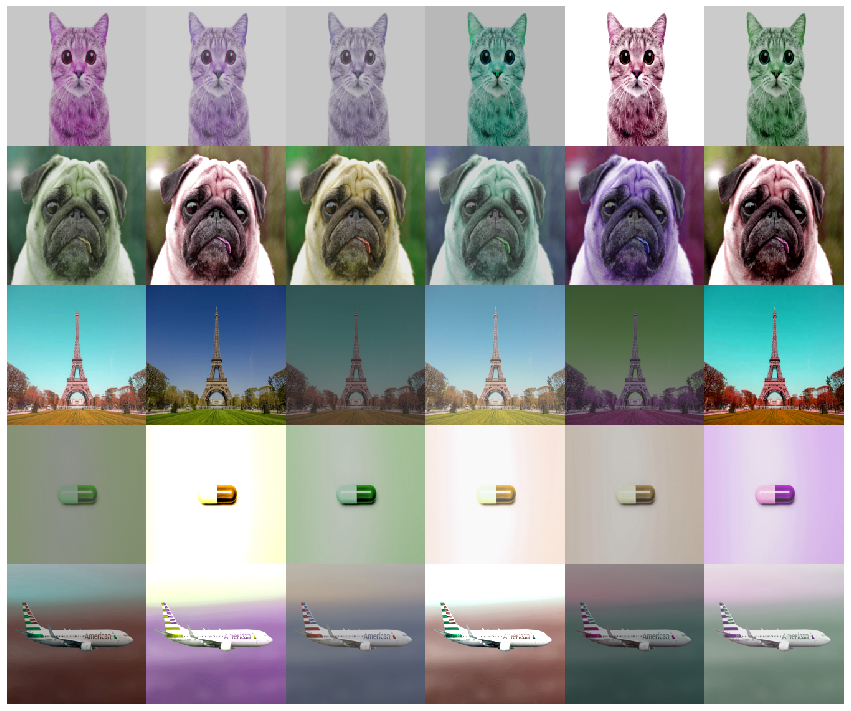

In [27]:
color = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.ColorJitter(hue=.4,
                                       saturation=.4, 
                                       brightness=.4,
                                       contrast=.4)
])
dataset = datasets.ImageFolder('../numerical_examples/data/examples', 
                               transform=color)
show_dataset(dataset)

The magnitude of this transformation is turned up, which makes the images really different from the original ones. Nevertheless if the network were to classify the cat, dog, eifeltower or a airplane, the color transformation would work well, even if alittle over the top. As for the pill if the network were to predict the type of pill the color will matter alot, and changing this might effect the results massivly. 

### Flipping

Flipping is a powerfull tool with not alot of code needed. Horizontal flipping is also a pretty safe transformation, cause it can mostly be applied to everything, because most natural things look the same or have the same meaning when viewed in the mirror. Text might be a thing that one shouldn't flip, if the network is meant to handle exactly this.

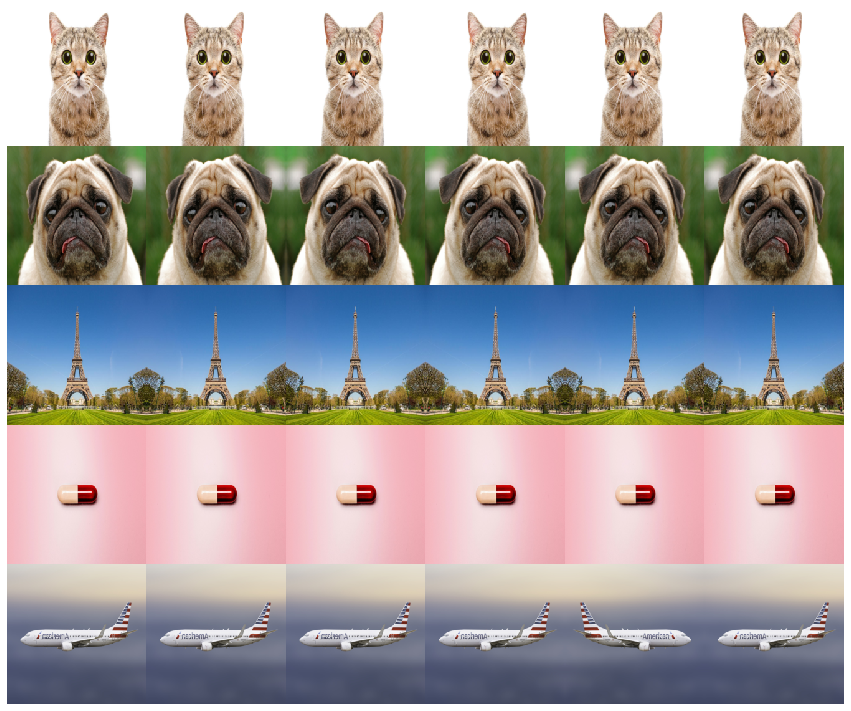

In [30]:
flipping_horizontal = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.RandomHorizontalFlip()
])
dataset = datasets.ImageFolder('../numerical_examples/data/examples', 
                               transform=flipping_horizontal)
show_dataset(dataset)

Vertical flipping however isn't necessarily the best transformation. A dog, cat, building or airplane won't be upside down in many images and this variation will most likely be alittle over the top. However if one looks at the pill, this transformation will yield a effective result. 

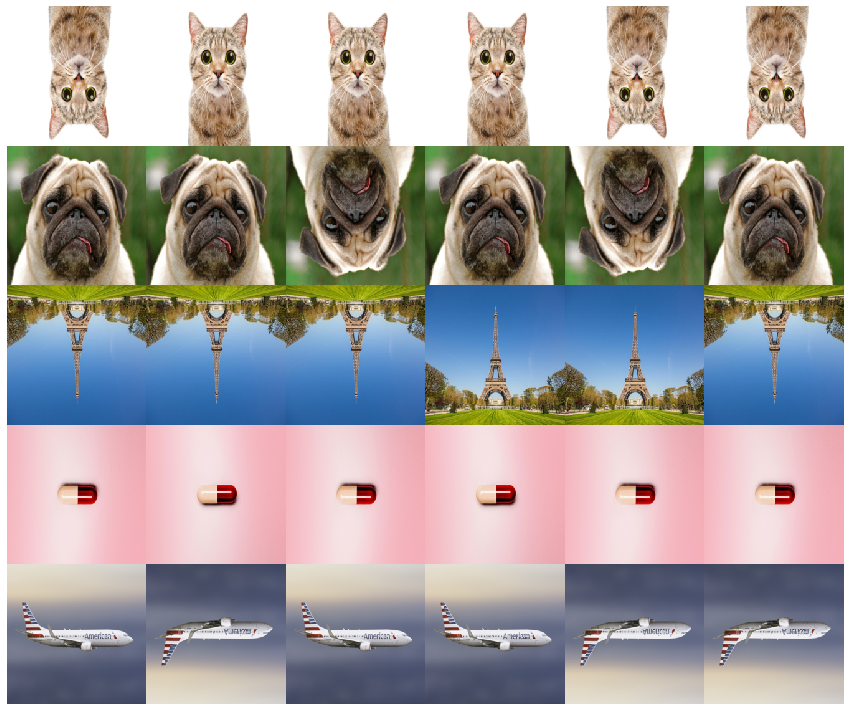

In [29]:
flipping_vertical = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.RandomVerticalFlip()
])
dataset = datasets.ImageFolder('../numerical_examples/data/examples', 
                               transform=flipping_vertical)
show_dataset(dataset)

Combining the two flipping transformations might also in some cases work well, but the same thing can be said for each individual image here. 

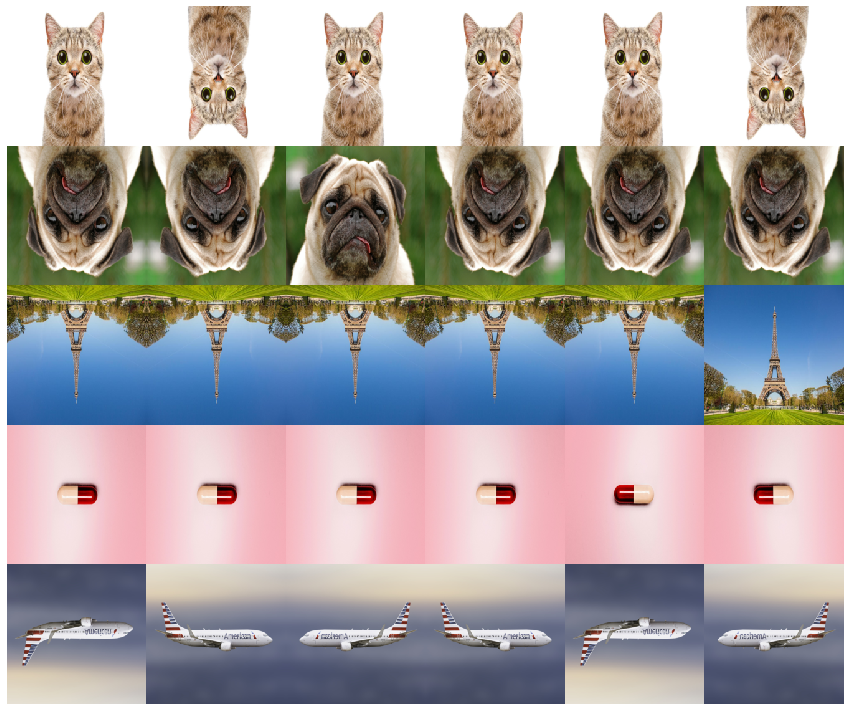

In [31]:
flipping = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.RandomVerticalFlip(),
    torchvision.transforms.RandomHorizontalFlip()
])
dataset = datasets.ImageFolder('../numerical_examples/data/examples', 
                               transform=flipping)
show_dataset(dataset)

### Rotation

The rotational transformation is really common, and can add alittle or alot of variation depending on the chosen angle domain. For the building small varation will be advantageous, and for the dog and cat alittle bit more variation. As for the airplane alot of angle variation would yield good resaults since this could be at liftoff or in landing. As for the pill there is really no treshold for to much rotation.

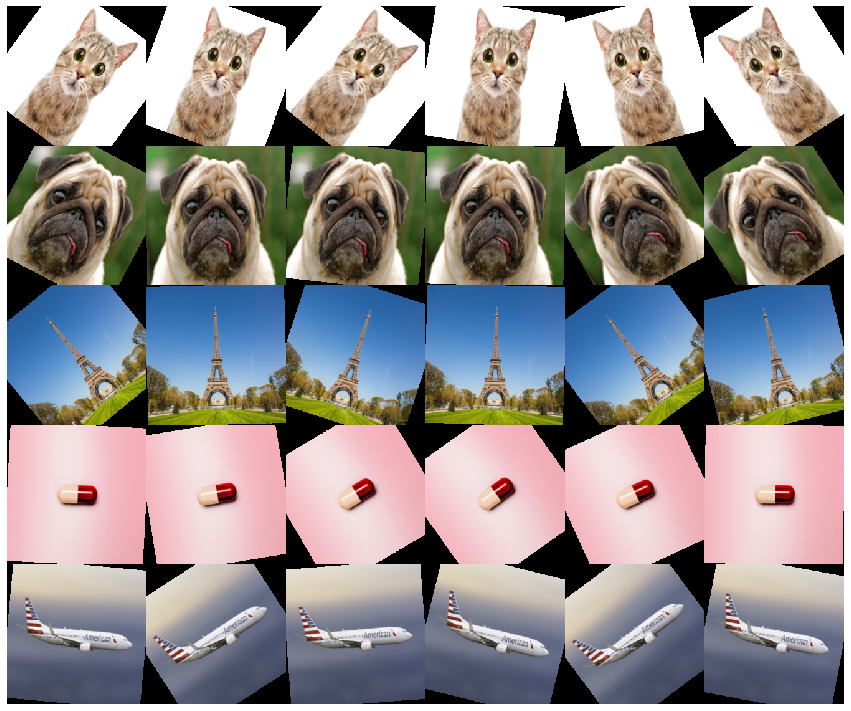

In [32]:
rotation = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.RandomRotation(40, resample=PIL.Image.BILINEAR)
])
dataset = datasets.ImageFolder('../numerical_examples/data/examples', 
                               transform=rotation)
show_dataset(dataset)

One important thing here is that we could crop the images such that the balck areas won't act as data into the network. There are also other techniques to account for these padding errors in the network.

### Perspective

The change of prespective is also a powerfull tool if applied correctly. Again this yields the black padding on the side of the images, which one might want to account for. The magnitude of thes perspective change is very large in the images below, but in most cases this would yield good variations to the dataset.

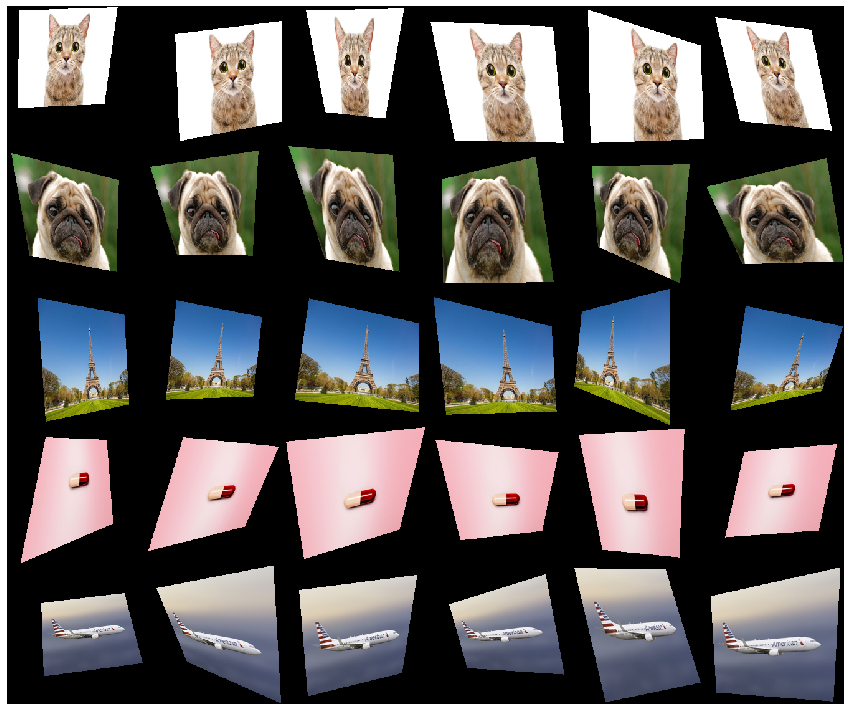

In [33]:
perspective = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.RandomPerspective(distortion_scale=0.6, p=1, interpolation=3)
])
dataset = datasets.ImageFolder('../numerical_examples/data/examples', 
                               transform=perspective)
show_dataset(dataset)

### Crop and resize

Cropping an image makes you lose some information, in other cases you would only lose backround noise. The backsides with applying this type of augmentation to the pipline is that one might crop to much and lose the important features of the object, in some cases the object can be totally outside of the crop. The resize part of this technique is to feed equally sized images into the network, and a interpolation technique is used for this. 

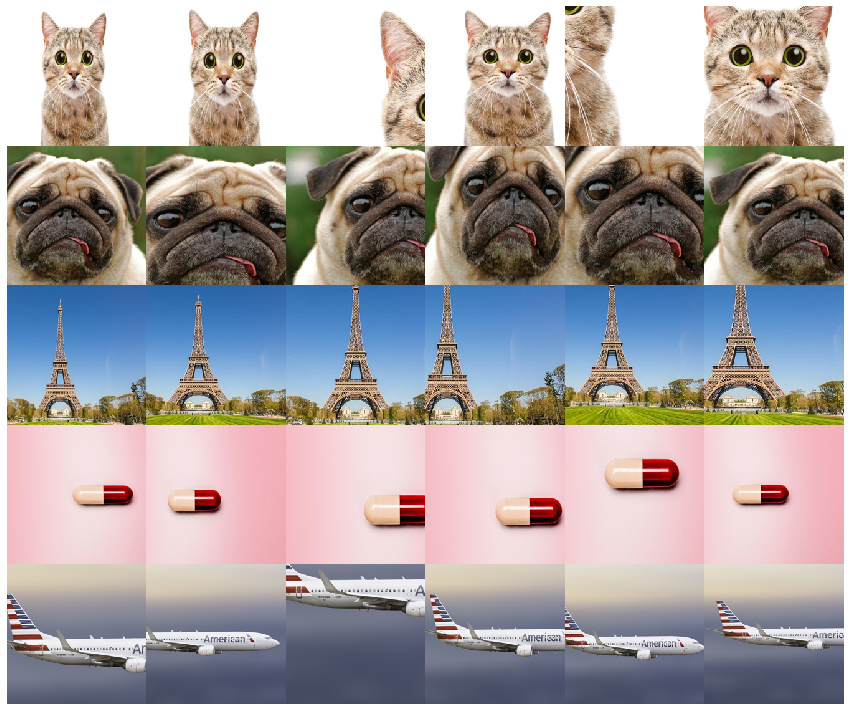

In [34]:
crop_resize = torchvision.transforms.Compose([
    torchvision.transforms.RandomResizedCrop(224, # image resize size
                                             scale=(0.08, 1.0), # range of size compared to the origin
                                             ratio=(0.75, 1.3333333333333333), # aspect ratio
                                             interpolation=3)
])
dataset = datasets.ImageFolder('../numerical_examples/data/examples', 
                               transform=crop_resize)
show_dataset(dataset)

### Everything together

Below we have given a example of combinations of the augmenations. The magnitude of each is the same as above, which again makes some of the images very tweeked and most of these combination wouldn't yield good results. Therefore it is important to set the hyperparameters of the augmenation in a good way. Multiple papers have been writen on data augmentation and what technique to use. In general one would apply some natural variation to the data, or in other words a variation that is probable when taking the image. 

New advancements has been made in data augmenation by google with the AutoAugment. It is a search based algorithm that finds the best augmentations and parameters to use on the datasets to yield the highest validation accuracy during trianing. They define a search space and predicts the augmentations using a Recurrent Neural Network(RNN), they then feed the augmented batch into to the main network which yields a validation accuracy, which is then fed into the controlled RNN to search for better augmentations (e.g. Reinforcement Learning). This has also later been improved to Fast AutoAugment.

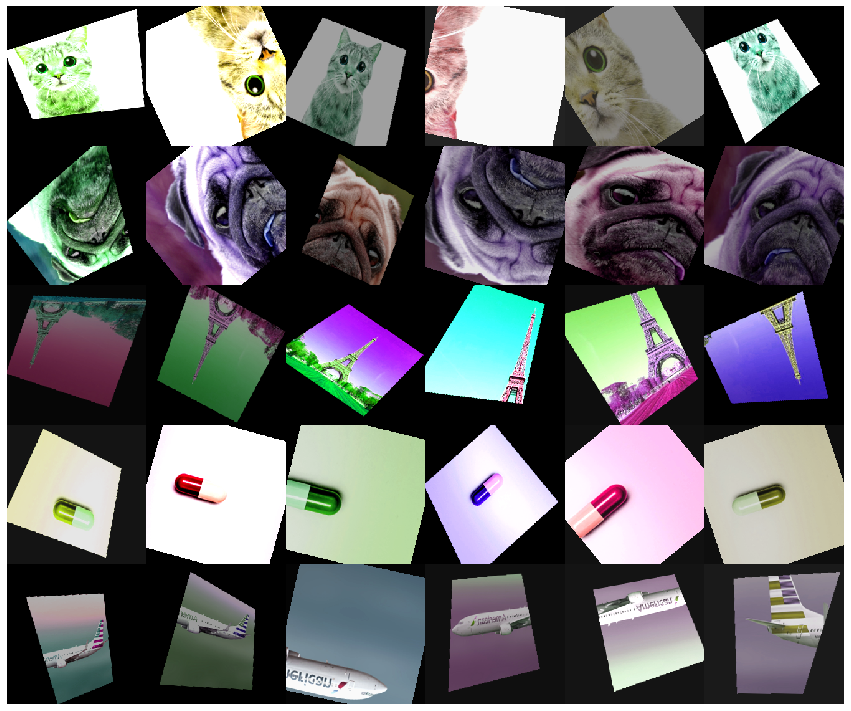

In [35]:
everything = torchvision.transforms.Compose([
    torchvision.transforms.RandomResizedCrop(224, scale=(0.08, 1.0), ratio=(0.75, 1.33), interpolation=3),
    torchvision.transforms.RandomPerspective(distortion_scale=0.6, p=0.7, interpolation=3),
    torchvision.transforms.RandomRotation(40, resample=PIL.Image.BILINEAR),
    torchvision.transforms.RandomVerticalFlip(),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ColorJitter(hue=.4, saturation=.4, brightness=.4,contrast=.4)
    
])
dataset = datasets.ImageFolder('../numerical_examples/data/examples', 
                               transform=everything)
show_dataset(dataset, n = 6)